# Erisoglu 2011 "New" Algorithm

See: [A new algorithm for initial cluster centers in k-means algorithm](https://www.sciencedirect.com/science/article/pii/S0167865511002248)

## Initial setup and configuration

In [1]:
import imports
import numpy as np
import sklearn.datasets as skdatasets
import sklearn.metrics as skmetrics 
from matplotlib import pyplot as plt
import kmeans
import utils
from initialisations import erisoglu

In [2]:
eris = erisoglu.Erisoglu()

dataset = skdatasets.load_iris()
data = dataset.data
target = dataset.target

K = 3

## Attempts to reproduce results

### Some descriptive statistics (Table 1)

In [15]:
for i in range(0, len(dataset.feature_names)):
    
    mean = np.mean(dataset.data.T[i])
    stddev = np.std(dataset.data.T[i])
    cvj = eris.variation_coefficient(dataset.data.T[i])
    
    print('%s: mean=%f, stdddev=%f, cvj=%f, ' % (dataset.feature_names[i], mean, stddev, cvj))
    

sepal length (cm): mean=5.843333, stdddev=0.825301, cvj=0.141238, 
sepal width (cm): mean=3.057333, stdddev=0.434411, cvj=0.142088, 
petal length (cm): mean=3.758000, stdddev=1.759404, cvj=0.468176, 
petal width (cm): mean=1.199333, stdddev=0.759693, cvj=0.633429, 


**TODO:** why is standard deviation slightly different?

### Correlations with other features (Table 2)

In [4]:
for i in [0,1,2]:
    
    corr = eris.correlation_coefficient(data.T[3], data.T[i])
    
    print('%s:\t%f' % (dataset.feature_names[i], corr))

sepal length (cm):	0.817941
sepal width (cm):	-0.366126
petal length (cm):	0.962865


### Paper selects petal width, sepal width as main, secondary:

In [17]:
main = eris._find_main_axis(data.T)
secondary = eris._find_secondary_axis(data.T, main)

print("Main feature deemed to be: %s" % (dataset.feature_names[main]))
print("Secondary feature deemed to be: %s" % (dataset.feature_names[secondary]))

Main feature deemed to be: petal width (cm)
Secondary feature deemed to be: sepal width (cm)


### Paper selects *m* = [1.993, 3.0573]

In [6]:
initial, axes = eris._initialise(dataset.data)
center = eris._find_center(data.T, axes)

print("Center was:", center)
print("Initial seed is:", initial)

Center was: [1.1993333333333334, 3.0573333333333332]
Initial seed is: 15


### Find seeds

Paper selects:

_m1_ = [3.615 0.2677 5.1774 1.4903]  
_m2_ = [2.9506 1.7916 6.4024 5.1193]  
_m3_ = [2.7917 0.6361 5.1278 2.5722]

In [11]:
seeds = eris.generate(dataset.data, K)

print(seeds)

[[5.7 4.4 1.5 0.4]
 [7.7 2.6 6.9 2.3]
 [4.5 2.3 1.3 0.3]]


__TODO:__ so these are clearly wrong...

## Run k-means

In [8]:
Z, U, clusters, iterations = kmeans.cluster(data, K, seeds.copy())

print(U)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


### Metrics

In [9]:
acc = skmetrics.accuracy_score(target, U)
ari = skmetrics.adjusted_rand_score(target, U)

print("Accuracy Score:", acc)
print("Adjusted Rand Index:", ari)

Accuracy Score: 0.44666666666666666
Adjusted Rand Index: 0.7163421126838475


**TODO:**

 - are these any good?
 - now try to run same against more datasets
 - ditto more metrics

## Graphs 

### Fig. 4a

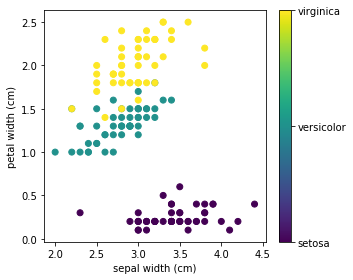

In [10]:
formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

plt.figure(figsize=(5, 4))

# nb. The paper plots them in a counter-intuitive fashion
plt.scatter(data[:, axes.secondary], data[:, axes.main], c=target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(dataset.feature_names[axes.secondary])
plt.ylabel(dataset.feature_names[axes.main])

plt.tight_layout()
plt.show()